In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pymysql python-dotenv

import os
from dotenv import load_dotenv
import sqlalchemy

# Carico il file .env dalla directory
dotenv_path = "/content/drive/MyDrive/EPICODE/M4_PYTHON/credenzialiDB.env"
load_dotenv(dotenv_path=dotenv_path, override=True)

# Verifica caricamento
print("✅ username:", os.getenv("username"))

# Estrazione variabili
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

# Verifica variabili mancanti
missing = [k for k, v in {"username": username, "password": password, "host": host, "dbname": dbname}.items() if v is None]
if missing:
    raise EnvironmentError(f"❌ Variabili d'ambiente mancanti: {', '.join(missing)}")

# 🔗 Costruzione della stringa di connessione
connection_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
print("🔗 Connection string costruita correttamente.")

# ⚙️ Creazione dell'engine SQLAlchemy
engine = sqlalchemy.create_engine(connection_string)

# 🔍 Test connessione
try:
    with engine.connect() as conn:
        print("✅ Connessione riuscita al database!")
except Exception as e:
    print("❌ Errore di connessione:", e)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.8 MB/s eta 0:00:00
✅ username: studente_dapt
🔗 Connection string costruita correttamente.
✅ Connessione riuscita al database!


In [3]:
import pandas as pd

query = "SELECT * FROM dimproduct"
df = pd.read_sql(query, engine)

In [4]:
#Quanti dati ci sono in totale?

print(df.shape)

(606, 36)


In [5]:
#Quali sono i metadati?

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             606 non-null    int64         
 1   ProductAlternateKey    606 non-null    object        
 2   ProductSubcategoryKey  397 non-null    float64       
 3   WeightUnitMeasureCode  282 non-null    object        
 4   SizeUnitMeasureCode    253 non-null    object        
 5   EnglishProductName     606 non-null    object        
 6   SpanishProductName     606 non-null    object        
 7   FrenchProductName      606 non-null    object        
 8   StandardCost           397 non-null    float64       
 9   FinishedGoodsFlag      606 non-null    int64         
 10  Color                  606 non-null    object        
 11  SafetyStockLevel       606 non-null    int64         
 12  ReorderPoint           606 non-null    int64         
 13  ListP

In [6]:
#Stampiamo il primo elemento

df.head(1)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,None,None,Adjustable Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current


In [7]:
#Stampiamo l'ultmo elemento

df.tail(1)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
605,606,BK-R19B-52,2.0,LB,CM,"Road-750 Black, 52","Carretera: 750, negra, 52","Vélo de route 750 noir, 52",343.65,1,...,入门级成人自行车；确保越野旅行或公路骑乘的舒适。快拆式车毂和轮缘。,إنها دراجة مناسبة للمبتدئين من البالغين؛ فهي ت...,"אופני מבוגרים למתחילים; מציעים רכיבה נוחה ""מחו...",จักรยานระดับเริ่มต้นสำหรับผู้ใหญ่ ให้ความสบายใ...,Ein Erwachsenenrad für Einsteiger; bietet Komf...,エントリー レベルに対応する、クロスカントリーにも街への買い物にも快適な、大人の自転車。ハブ...,"""Başlangıç seviyesinde yetişkin bisikleti, kır...",2013-07-01,NaT,Current


In [8]:
#Riusciamo a stampare cinque elementi a caso?

df.sample(5)

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
144,145,LW-1400,NaN,None,None,Lock Washer 6,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
23,24,FW-1400,NaN,None,None,Flat Washer 2,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current
393,394,HS-0296,11.0,None,None,LL Headset,Dirección GB,Jeu de direction LL,15.18,1,...,无螺纹的车头碗组不仅确保质量而且经济实惠。,توفر الوصلة غير الملولبة بين الشوكة الماسكة لل...,טבעת נטולת תבריג מספקת איכות במחיר חסכוני.,ชุดประกอบส่วนหัวไม่มีเกลียว คุณภาพสูงในราคาประ...,Hochwertiger Lenkkopf zu einem guten Preis.,スレッドレスのヘッドセットは、手ごろな価格で高品質を提供します。,Furş takımı kaliteyi ekonomik bir fiyata sunar.,2012-07-01,2008-12-27,None
219,220,HL-U509-B,31.0,None,None,"Sport-100 Helmet, Blue","Casco deportivo: 100, azul","Casque sport 100, bleu",12.03,1,...,通用型透气良好且轻便，带有自合型帽沿。,ملائمة بشكل عام، وجيدة التهوية، وخفيفة الوزن ب...,"מידה אונברסלית, מאווררת היטב, קלת-משקל, עם מצח...",แว่นกันลมขนาดสากล ระบายอากาศได้ดี น้ำหนักเบา,"""Einheitsgröße, atmungsaktiv, leicht, aufsetzb...",軽量で通気性に優れたユニバーサル フィットのスナップ オン バイザー。,"""Her bisiklete kolayca takılabilen, aerodinami...",2011-07-01,2007-12-28,None
78,79,HU-6280,NaN,None,None,LL Hub,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current


In [9]:
#Quali sono i colori disponibili?

print(df["Color"].unique())

['NA' 'Black' 'Silver' 'Red' 'White' 'Blue' 'Multi' 'Yellow' 'Grey'
 'Silver/Black']


In [10]:
#In media quanto pesano i prodotti?

print("Media prodotti:", df["Weight"].mean().round(2))

Media prodotti: 56.19


In [11]:
#Quanto pesa il più leggero?

print("Peso prodotto più leggero:", df["Weight"].min())

Peso prodotto più leggero: 2.12


In [12]:
#Quanto pesa il più pesante?

print("Peso prodotto più pesante:", df.Weight.max())

Peso prodotto più pesante: 1050.0


In [13]:
#Quanti prodotti pesano più di 100 Kg?

import matplotlib.pyplot as plot

filtro = df.loc[:,"Weight"] > 100
heavy_prod = df.loc[filtro,["EnglishProductName","Weight"]].sort_values("Weight", ascending=False)
print(heavy_prod)

      EnglishProductName  Weight
421   LL Road Rear Wheel  1050.0
422   ML Road Rear Wheel  1000.0
412  LL Road Front Wheel   900.0
423   HL Road Rear Wheel   890.0
413  ML Road Front Wheel   850.0
414  HL Road Front Wheel   650.0
556          ML Crankset   635.0
555          LL Crankset   600.0
557          HL Crankset   575.0
185          Touring Rim   460.0
183          ML Road Rim   450.0
180      ML Mountain Rim   450.0
182          LL Road Rim   445.0
179      LL Mountain Rim   435.0
184          HL Road Rim   400.0
181      HL Mountain Rim   400.0
554         Front Brakes   317.0
513          Rear Brakes   317.0
600    LL Bottom Bracket   223.0
541    LL Mountain Pedal   218.0
500      Rear Derailleur   215.0
542    ML Mountain Pedal   215.0
544        LL Road Pedal   189.0
543    HL Mountain Pedal   185.0
602    HL Bottom Bracket   170.0
545        ML Road Pedal   168.0
601    ML Bottom Bracket   168.0
546        HL Road Pedal   149.0


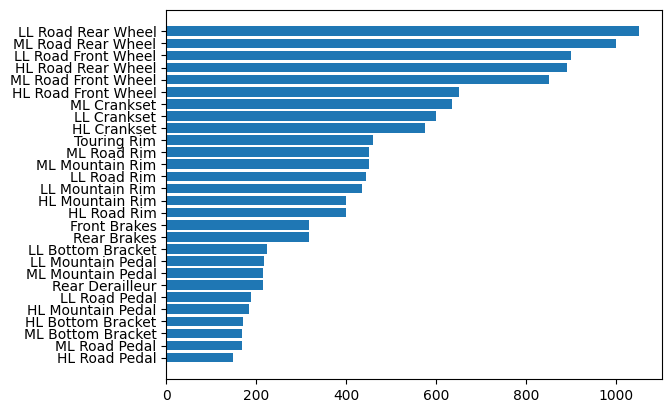

In [14]:
heavy_prod = df.loc[filtro,["EnglishProductName","Weight"]].sort_values("Weight")
plot.barh(heavy_prod["EnglishProductName"], heavy_prod["Weight"])
plot.show()

In [15]:
#Quanto costano in media i prodotti (colonna DealerPrice)?

costo_medio = df['DealerPrice'].mean()
print(f"Il costo medio dei prodotti è: {costo_medio:.2f}$")

Il costo medio dei prodotti è: 448.60$


In [16]:
#Se prendiamo un quarto di tutti i prodotti, in modo che siano i più costosi, quale sarà il loro range di prezzo?

high_price_range = df['DealerPrice'].describe()
range_75 = high_price_range.loc["75%"]
range_max = high_price_range.loc["max"]
print(f'Il range di prezzo varia da {range_75:.2f}$ a {range_max:.2f}$')

Il range di prezzo varia da 722.59$ a 2146.96$


In [17]:
#Qual è il prezzo medio per i prodotti di colore blu?

blue_products = df.loc[df["Color"] == "Blue"]
blue_products_mean = blue_products["DealerPrice"].mean()
print(f"Il prezzo medio dei prodotti blu è: {blue_products_mean:.2f}$")

Il prezzo medio dei prodotti blu è: 516.06$


In [18]:
#Qual è il prezzo medio per i prodotti di colore rosso o nero?

red_products = df.loc[df["Color"]=="Red"]
red_mean = red_products["DealerPrice"].mean()
black_products = df.loc[df["Color"]=="Black"]
black_mean = black_products["DealerPrice"].mean()
red_or_black_mean = (input("Inserire il colore desiderato (Rosso o Nero):"))

if red_or_black_mean == "Rosso":
  print(f"Il prezzo medio dei prodotti rossi è: {red_mean:.2f}$")
else:
  print(f"Il prezzo medio dei prodotti neri è: {black_mean:.2f}$")

Inserire il colore desiderato (Rosso o Nero):Rosso
Il prezzo medio dei prodotti rossi è: 705.96$


In [19]:
#Qual è il prezzo massimo per i prodotti di taglia 42 e peso oltre i 10 Kg?

filter_size = df.loc[:,"Size"] == "42"
filter_weight = df.loc[:,"Weight"] > 10
filter = filter_size & filter_weight

df.loc[filter,["EnglishProductName","DealerPrice"]].sort_values(by="DealerPrice", ascending=False)


,EnglishProductName,DealerPrice
344,"Mountain-100 Silver, 42",2039.9940
348,"Mountain-100 Black, 42",2024.9940
354,"Mountain-200 Silver, 42",1391.9940
360,"Mountain-200 Black, 42",1376.9940
353,"Mountain-200 Silver, 42",1242.8518
359,"Mountain-200 Black, 42",1229.4589
580,"Road-350-W Yellow, 42",1020.5940
385,"Road-550-W Yellow, 42",672.2940
384,"Road-550-W Yellow, 42",600.2625
588,"Mountain-400-W Silver, 42",461.6940


In [20]:
#Qual è il nome inglese e il costo di produzione (StandardCost) di tutti i prodotti di taglia 42, peso oltre i 10 Kg e colore argento?

filter_size = df.loc[:,"Size"] == "42"
filter_weight = df.loc[:,"Weight"] > 10
filter_color = df.loc[:, "Color"] == "Silver"
filter = filter_size & filter_weight &filter_color

df.loc[filter,["EnglishProductName","DealerPrice"]].sort_values(by="DealerPrice", ascending=False)

,EnglishProductName,DealerPrice
344,"Mountain-100 Silver, 42",2039.9940
354,"Mountain-200 Silver, 42",1391.9940
353,"Mountain-200 Silver, 42",1242.8518
588,"Mountain-400-W Silver, 42",461.6940
591,"Mountain-500 Silver, 42",338.9940


In [21]:
#Esaminiamo la differenza tra lo StandardCost e il DealerPrice degli ultimi 20 elementi del dataset:
#c'è un pattern? C'è qualche elemento che non lo segue?

print("Lo standard cost degli ultimi tre elementi (603, 604, 605) è superiore al suo prezzo di vendita","\n")
print(df.loc[df.tail(20).index,["StandardCost", "DealerPrice"]])

Lo standard cost degli ultimi tre elementi (603, 604, 605) è superiore al suo prezzo di vendita 

     StandardCost  DealerPrice
586        419.78      461.694
587        419.78      461.694
588        419.78      461.694
589        419.78      461.694
590        308.22      338.994
591        308.22      338.994
592        308.22      338.994
593        308.22      338.994
594        308.22      338.994
595        294.58      323.994
596        294.58      323.994
597        294.58      323.994
598        294.58      323.994
599        294.58      323.994
600         23.97       32.394
601         44.95       60.744
602         53.94       72.894
603        343.65      323.994
604        343.65      323.994
605        343.65      323.994


In [22]:
#selezioniamo amazon.csv, un dataset contenente una serie di recensioni su Amazon.
df_amazon = pd.read_csv("/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/amazon.csv")

#Valutiamo la dimensione del dataset
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [23]:
 #Visualizziamo dieci righe a caso;

df_amazon.sample(10)


,reviewText,Positive
19789,Take a nice friendly game with positive activi...,0
9051,You don&apos;t need this sort of thing with an...,0
14771,Too complicated for me. Was hoping to find som...,0
18885,I think this app is horrible if u have a kindl...,0
3204,this game is just so much fun. thats all there...,1
19542,My only complaint isn't really a complaint. I ...,1
5465,I love this game loll by the if you play offli...,1
7801,"I love this apps! That what I want!! It's,muc...",1
14409,This is a lonely peace of poop first time it r...,0
8212,this is the best app ever!!! I Dp not know why...,1


In [24]:
#Osserviamo quali sono i nomi di colonna;

df_amazon.columns

Index(['reviewText', 'Positive'], dtype='object')

In [25]:
#Il dataset è bilanciato, ovvero, il numero di recensioni positive è uguale a quello delle negative, oppure no?

df_amazon['Positive'].value_counts()

,count
Positive,
1,15233
0,4767


In [26]:
#Il dataset diabetes.csv raccoglie persone con diabete o meno, e il valore di diverse variabili fisiologiche dei pazienti.
df_diabetes = pd.read_csv("/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/diabetes.csv")

#Qual è la media della pressione sanguigna diastolica per le diverse fasce di età?
diab_filter20_40 = (df_diabetes.loc[:,"Age (years)"] >= 20) & (df_diabetes.loc[:,"Age (years)"] < 40)
diab_filter40_60 = (df_diabetes.loc[:,"Age (years)"] >= 40) & (df_diabetes.loc[:,"Age (years)"] < 60)
diab_filter_over60 = df_diabetes.loc[:,"Age (years)"] >= 60

print("Pressione diastolica fascia 20-40:", diab_filter20_40.mean())
print("Pressione diastolica fascia 40-60:", diab_filter40_60.mean())
print("Pressione diastolica fascia 60+:", diab_filter_over60.mean())



Pressione diastolica fascia 20-40: 0.73046875
Pressione diastolica fascia 40-60: 0.22786458333333334
Pressione diastolica fascia 60+: 0.041666666666666664


In [27]:
#Qual è la media della pressione per ogni singolo anno di età?

Diastolic_mean_by_age = df_diabetes.groupby("Age (years)")["Diastolic blood pressure (mm Hg)"].mean()
Diastolic_mean_by_age

,Diastolic blood pressure (mm Hg)
Age (years),
21,65.936508
22,63.722222
23,64.315789
24,64.956522
25,59.666667
26,64.181818
27,73.500000
28,68.314286
29,68.241379


In [28]:
#Osserviamone le dimensioni e un'anteprima di cinque righe;
df_diabetes.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Prendiamoci un po' di tempo per dare un'occhiata ai metadati delle colonne;
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [30]:
# Stampiamo dei descrittori statistici del dataset; •
df_diabetes.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#Selezioniamo i dati relativi a diverse fasce di età: <20, 20-30, 30-40, 40-50, >50;

# SOLUZIONE 1 - Input scelta fascia d'età

# Determino i filtri
age_20_filter = df_diabetes["Age (years)"] < 20
age_20_30_filter = (df_diabetes["Age (years)"] >=20) & (df_diabetes["Age (years)"] <30)
age_30_40_filter = (df_diabetes["Age (years)"]>=30) & (df_diabetes["Age (years)"] <40)
age_40_50_filter = (df_diabetes["Age (years)"]>=40) & (df_diabetes["Age (years)"] <50)
age_50_filter = df_diabetes["Age (years)"] > 50

# L'utente inserisce l'input
age_input_str = input("Inserire la fascia di età desiderata (<20, 20-30, 30-40, 40-50, >50): ")

# L'input è associato ai filtri
if age_input_str == "<20":
    age_filter = age_20_filter

elif age_input_str == "20-30":
    age_filter = age_20_30_filter

elif age_input_str == "30-40":
    age_filter = age_30_40_filter

elif age_input_str == "40-50":
    age_filter = age_40_50_filter

elif age_input_str == ">50":
    age_filter = age_50_filter
else:
    print("Input non valido. Si prega di inserire una delle opzioni fornite.")

# Output finale (formattazione dataframe)
df_diabetes[age_filter]


Inserire la fascia di età desiderata (<20, 20-30, 30-40, 40-50, >50): 20-30


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
20,3,126,88,41,235,39.3,0.704,27,0
23,9,119,80,35,0,29.0,0.263,29,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
758,1,106,76,0,0,37.5,0.197,26,0
760,2,88,58,26,16,28.4,0.766,22,0
764,2,122,70,27,0,36.8,0.340,27,0


In [32]:
# Selezioniamo i dati relativi a diverse fasce di età: <20, 20-30, 30-40, 40-50, >50;

# SOLUZIONE 2 - Utilizzo funzione pd.cut

# Definisco i bin e le etichette
bins = [-float("inf"), 20, 30, 40, 50, float("inf")]
labels = ["<20", "20‑29", "30‑39", "40‑49", "50+"]

# Creo una colonna di fascia età
df_diabetes["fascia_età"] = pd.cut(df_diabetes["Age (years)"], bins=bins, labels=labels, right=False)


# Loop per definire i dati filtrati
for band in labels:
    subset = df_diabetes.loc[df_diabetes["fascia_età"] == band, df_diabetes.columns[:8]]
    print(f"\n Fascia {band}\n", subset)



 Fascia <20
 Empty DataFrame
Columns: [Number of times pregnant, Plasma glucose concentration a 2 hours in an oral glucose tolerance test, Diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm), 2-Hour serum insulin (mu U/ml), Body mass index (weight in kg/(height in m)^2), Diabetes pedigree function, Age (years)]
Index: []

 Fascia 20‑29
      Number of times pregnant  \
3                           1   
6                           3   
7                          10   
20                          3   
23                          9   
..                        ...   
753                         0   
758                         1   
760                         2   
764                         2   
767                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
3                                                   89                          
6                                                   78                          
7    

In [33]:
# Il dataset insurance.csv contiene dati rispetto a caratteristiche e abitudini delle persone,
# e della zona in cui vivono, rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute.
df_insurance = pd.read_csv("/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/insurance.csv")

In [34]:
# Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
print("\n Dimensioni dataframe \n", df_insurance.shape)
print("\n Dataframe info"), df_insurance.info()
print("\n Anteprima dataframe \n",df_insurance.head())
print("\n Nomi colonne \n", df_insurance.columns)


 Dimensioni dataframe 
 (1338, 7)

 Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

 Anteprima dataframe 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

 Nomi colonne 
 Ind

In [35]:
# Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
# E rispetto a smoker? E a sex?
for col in ["region", "smoker", "sex"]:
  print("\n", df_insurance.groupby(col)["charges"].mean())


 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

 sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [36]:
# Quali sono i descrittori statistici di bmi?
df_insurance["bmi"].describe()


,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [37]:
# Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?
df_insurance["bmi_quartile"] = pd.qcut(df_insurance["bmi"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
df_insurance.groupby("bmi_quartile")["charges"].agg(["min", "mean", "max"])


<ipython-input-37-234e2d96f4cc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_insurance.groupby("bmi_quartile")["charges"].agg(["min", "mean", "max"])


,min,mean,max
bmi_quartile,,,
Q1,1121.8739,10360.662825,38245.59327
Q2,1131.5066,11407.831468,62592.87309
Q3,1135.9407,14358.173081,60021.39897
Q4,1141.4451,16987.936691,63770.42801


In [108]:
#Il dataset pokemon.csv contiene un database di Pokémon, con dati quali nome,
# tipi di attacco, valori di attacco/difesa/eccetera, e se sono o meno leggendari.

df_pokemon = pd.read_csv("/content/drive/MyDrive/EPICODE/M4_PYTHON/datasets/datasets/beginner_datasets/pokemon.csv")


#• Verifichiamo la dimensione, un'anteprima e osserviamo i nomi di colonna;
print("\n Dimensioni dataframe \n", df_pokemon.shape)
print("\n Dataframe info"), df_pokemon.info()
print("\n Anteprima dataframe \n",df_pokemon.head())
print("\n Nomi colonne \n", df_pokemon.columns)



 Dimensioni dataframe 
 (800, 13)

 Dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB

 Anteprima dataframe 
    #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2       

In [109]:
#• È verosimile che la prima colonna dovrebbe essere un indice?
print(df_pokemon.head(5))

#• Confrontiamolo con l'indice messo automaticamente da Pandas: combaciano?
print("\nLa prima colonna e l'indice non combaciano")


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  

La prima colonna e l'indice non combaciano


In [110]:
# Se no, settare la prima colonna come indice.
df_pokemon = df_pokemon.set_index("#")
df_pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [111]:
# Filtra solo i Pokémon leggendari
# Quali sono i Pokémon leggendari?
legendary_df = df_pokemon[df_pokemon["Legendary"] == True]
num_legendary = legendary_df.shape[0]
legendary_names = legendary_df["Name"].index
print("\nNomi dei Pokemon leggendari\n","\n", legendary_names)


Nomi dei Pokemon leggendari
 
 Index([144, 145, 146, 150, 150, 150, 243, 244, 245, 249, 250, 377, 378, 379,
       380, 380, 381, 381, 382, 382, 383, 383, 384, 384, 385, 386, 386, 386,
       386, 480, 481, 482, 483, 484, 485, 486, 487, 487, 491, 492, 492, 493,
       494, 638, 639, 640, 641, 641, 642, 642, 643, 644, 645, 645, 646, 646,
       646, 716, 717, 718, 719, 719, 720, 720, 721],
      dtype='int64', name='#')


In [82]:

#E quali sono i leggendari di tipo 1
leg_t1 = legendary_df["Type 1"]
num_leg_t1 =leg_t1.value_counts()
print("\n Pokemon leggendari tipo 1\n", leg_t1)
print("\n Conteggio categorie tipo 1\n", num_leg_t1)

# Grass? E leggendari di tipo 1 Ice o Fire?
print("\n", "\n Totale leggendari", num_legendary)
for t in ["Grass", "Ice", "Fire"]:
    count = num_leg_t1.get(t, 0)
    print(f"\nPokemon leggendari di tipo {t}: {count}")


Nomi dei Pokemon leggendari
 
 Index([144, 145, 146, 150, 150, 150, 243, 244, 245, 249, 250, 377, 378, 379,
       380, 380, 381, 381, 382, 382, 383, 383, 384, 384, 385, 386, 386, 386,
       386, 480, 481, 482, 483, 484, 485, 486, 487, 487, 491, 492, 492, 493,
       494, 638, 639, 640, 641, 641, 642, 642, 643, 644, 645, 645, 646, 646,
       646, 716, 717, 718, 719, 719, 720, 720, 721],
      dtype='int64', name='#')

 Pokemon leggendari tipo 1
 #
144         Ice
145    Electric
146        Fire
150     Psychic
150     Psychic
         ...   
719        Rock
719        Rock
720     Psychic
720     Psychic
721        Fire
Name: Type 1, Length: 65, dtype: object

 Conteggio categorie tipo 1
 Type 1
Psychic     14
Dragon      12
Fire         5
Rock         4
Water        4
Steel        4
Electric     4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64

 
 Totale leggendari 65

Pokemon leggend

In [72]:
 # Ordiniamo il dataset per la colonna Name; • Trasformiamo Name nell'indice;
 df_pokemon = df_pokemon.sort_values(by="Name")
 df_pokemon = df_pokemon.set_index("Name")
 df_pokemon.head(5)

KeyError: "None of ['Name'] are in the columns"

In [58]:
# Quali sono i Pokémon della prima generazione con attacco > 50 e HP < 60?
df_pokemon[(df_pokemon["Generation"] == 1) & (df_pokemon["Attack"] > 50) & (df_pokemon["HP"] < 60)].sort_values(by=["Attack", "HP"], ascending=False)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Kingler,Water,NaN,475,55,130,115,50,50,75,1,False
Hitmonlee,Fighting,NaN,455,50,120,53,35,110,87,1,False
Hitmonchan,Fighting,NaN,455,50,105,79,35,110,76,1,False
Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False
Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
Ponyta,Fire,NaN,410,50,85,55,65,65,90,1,False
Doduo,Normal,Flying,310,35,85,45,35,35,75,1,False
Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False
